In [1]:
%matplotlib inline
import numpy as np
import time
from random import random
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from util_data_pixels import *
from amorgibbs_v import *
from smc_v import *
from util_plots import *
from torch.distributions.dirichlet import Dirichlet
import sys
sys.path.append('/home/hao/Research/probtorch/')
from probtorch.util import expand_inputs
import probtorch
print('probtorch:', probtorch.__version__, 
      'torch:', torch.__version__, 
      'cuda:', torch.cuda.is_available())

probtorch: 0.0+5a2c637 torch: 0.5.0a0+3bb8c5e cuda: True


In [2]:
## Dataset parameters
num_series = 1
## range of length of tracjectories, need to be positive integers
T_min = 30
T_max = 50
K = 4
D = 2
dt = 6
Boundary = 32
noise_ratio = 0.5

## image paramters
pixels = 64
dpi = 200
radius = 3
## Model Parameters
num_particles_rws = 30
mcmc_steps = 3
num_particles_smc = 40
NUM_HIDDEN = 128
NUM_LATENTS = K*K
NUM_OBS = 2 * K

NUM_EPOCHS = 1000
LEARNING_RATE = 1e-3
CUDA = False
RESTORE = False
PATH_ENC = "experiment/enc-%drws-%dmcmc-%dsmc-enc" % (num_particles_rws, mcmc_steps, num_particles_smc)

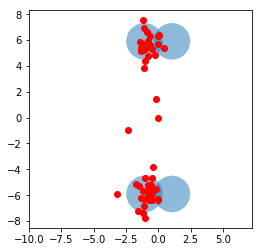

In [3]:
T_sample = 50
noise_cov = np.array([[1, 0], [0, 1]]) * noise_ratio
init_v = np.random.random(2) * np.random.choice([-1,1], size=2)
v_norm = ((init_v ** 2 ).sum()) ** 0.5 ## compute norm for each initial velocity
init_v = init_v / v_norm * dt ## to make the velocity lying on a circle
STATE, Disp, A_true, Zs_true = generate_seq(T_sample, dt, Boundary, init_v, noise_cov, radius)
## true global variables
cov_true = np.tile(noise_cov, (K, 1, 1))
dirs = np.array([[1, 1], [1, -1], [-1, -1], [-1, 1]])
mu_true = np.tile(np.absolute(init_v), (K, 1)) * dirs
plot_clusters(Disp, mu_true, cov_true, K)

In [4]:
T_sample = 50
num_seq = 200
# generate_pixels(T_sample, num_seq, Boundary, dt, noise_ratio, pixels, dpi, radius)